In [50]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import functional as F
data = scipy.io.loadmat('../data/TsukubaHandSize24x24.mat')
data = data['data']

(24, 24, 33600, 30)


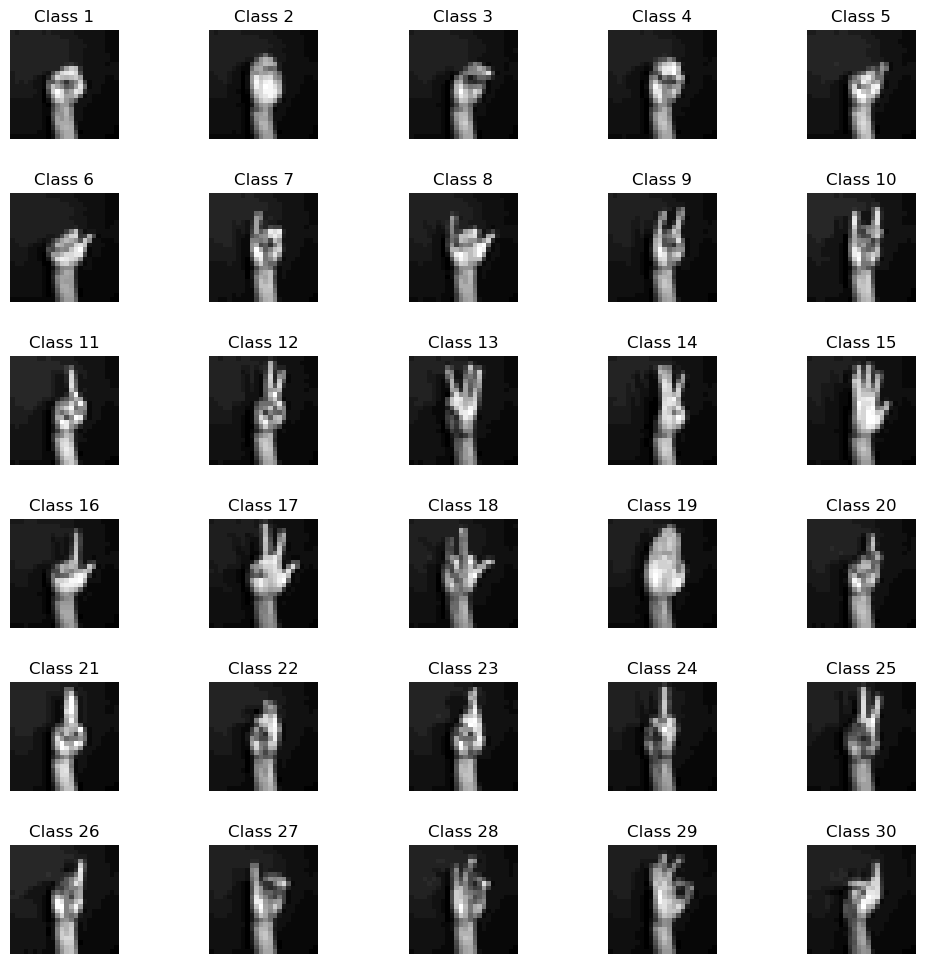

30
(24, 24, 33600)


In [51]:
# plit data into train and test
def split_train_test(data, test_ratio=0.2):
    num_people = data.shape[5]
    num_test = int(num_people * test_ratio)
    test_data = data[:, :, :, :, :, :num_test]
    train_data = data[:, :, :, :, :, num_test:]
    return train_data, test_data

X_train, X_test = split_train_test(data)

# combine all camera images
X_test = X_test.reshape(24, 24, 60*7, 30, 20)
X_train = X_train.reshape(24, 24, 60*7, 30, 80)
# Reorganize data to have shape (24, 24, 33600, 30)
X_train = np.transpose(X_train, (0, 1, 4, 2, 3))
X_train = np.reshape(X_train, (24, 24, 420 * 80, 30))

print(X_train.shape)
# Split the array along the last axis
X_train = np.split(X_train, 30, axis=3)

# Convert each element of the split array into an array of shape (24, 24, 33600)
X_train = [arr.squeeze(axis=3) for arr in X_train]
# Select the first image of each class
first_images = [cls_arr[:, :, 0] for cls_arr in X_train]

# Set up the grid for displaying the images
grid_rows = 6
grid_cols = 5
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 12))

# Plot the first image of each class on the grid
for i, img in enumerate(first_images):
    row = i // grid_cols
    col = i % grid_cols
    ax = axes[row, col]
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Class {i+1}')
    ax.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the grid of images
plt.show()

print(len(X_train))
print(X_train[0].shape)

In [54]:
# Flatten all images in each class array
X_train = [_x.reshape(24 * 24, 33600) for _x in X_train]

# Transpose elements of each flattened class array
X_train = [_x.T for _x in X_train]

print(len(X_train))
print(X_train[0].shape)

30
(33600, 576)
